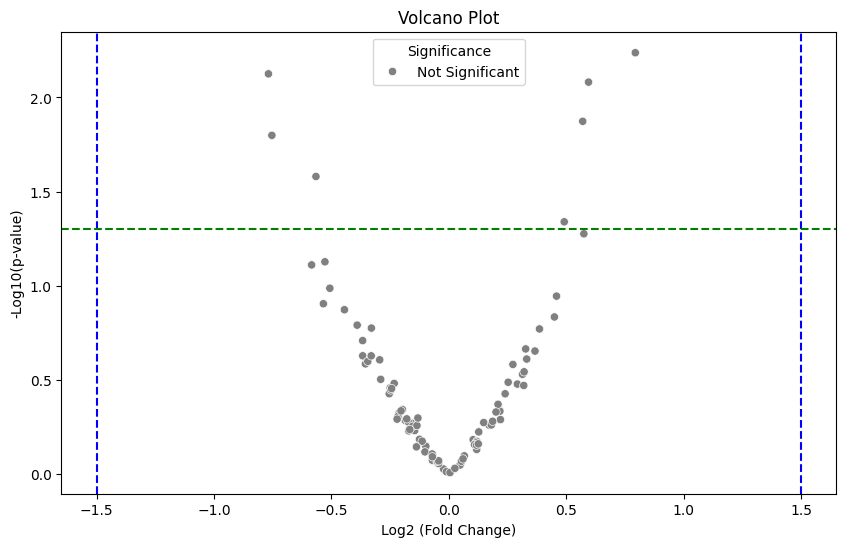

In [1]:
# Volcano plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load data
data = pd.read_csv("cancer_expression.csv")

# Identify control and treatment columns
control_cols = [col for col in data.columns if 'Control' in col]
treatment_cols = [col for col in data.columns if 'Treatment' in col]

# Calculate mean expression
data['Mean_Control'] = data[control_cols].mean(axis=1)
data['Mean_Treatment'] = data[treatment_cols].mean(axis=1)

# Calculate log2 fold change
data['log2FoldChange'] = np.log2(data['Mean_Treatment'] + 1e-6) - np.log2(data['Mean_Control'] + 1e-6)

# Perform t-tests
ttest_results = ttest_ind(data[treatment_cols].values, data[control_cols].values, axis=1, equal_var=False)
data['p-value'] = ttest_results.pvalue
data['-log10(p-value)'] = -np.log10(data['p-value'])

# Classify significance
fc_thresh = 1.5
p_thresh = 0.05
data['Significance'] = 'Not Significant'
data.loc[(data['log2FoldChange'] > fc_thresh) & (data['p-value'] < p_thresh), 'Significance'] = 'Significance'

# Plot volcano
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='log2FoldChange', y='-log10(p-value)', hue='Significance', palette={'Not Significant':'grey','Significance':'red'})
plt.axvline(fc_thresh, color='blue', linestyle='--')
plt.axvline(-fc_thresh, color='blue', linestyle='--')
plt.axhline(-np.log10(p_thresh), color='green', linestyle='--')
plt.title('Volcano Plot')
plt.xlabel('Log2 (Fold Change)')
plt.ylabel('-Log10(p-value)')
plt.show()

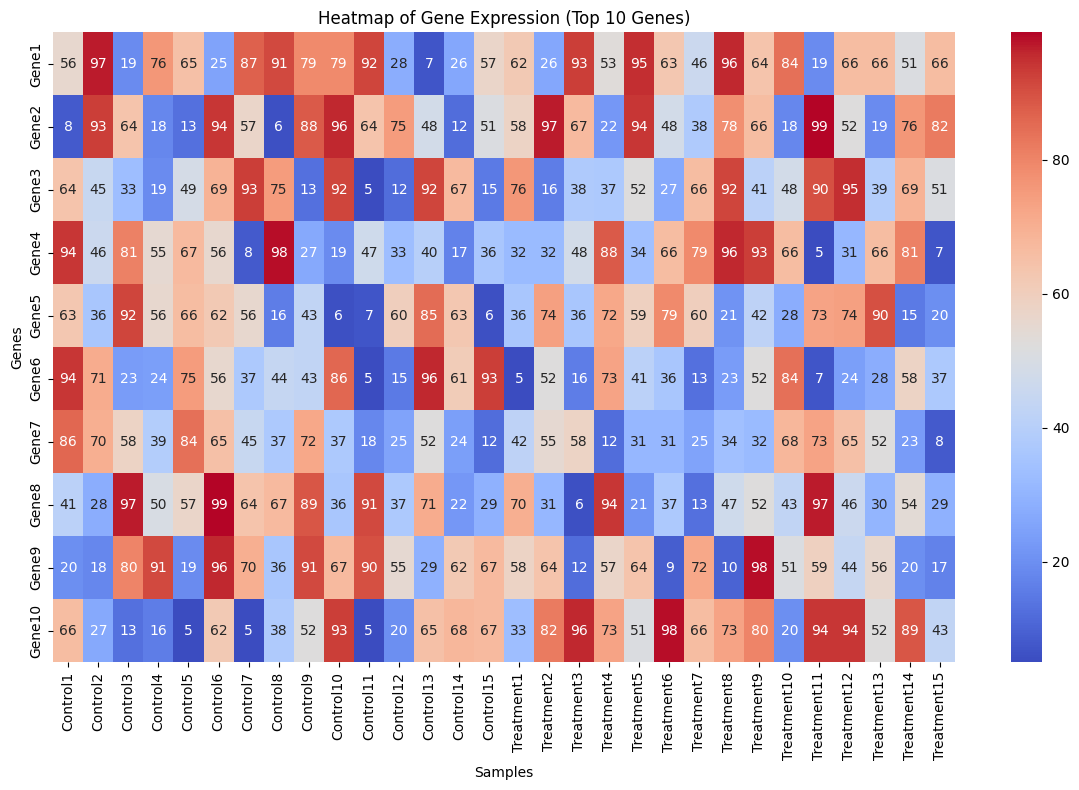

In [2]:
# Head map

# Prepare heatmap data
heatmap_data = data.set_index('Gene')
heatmap_data = heatmap_data[control_cols + treatment_cols].head(10)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True)
plt.title('Heatmap of Gene Expression (Top 10 Genes)')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.tight_layout()
plt.show()

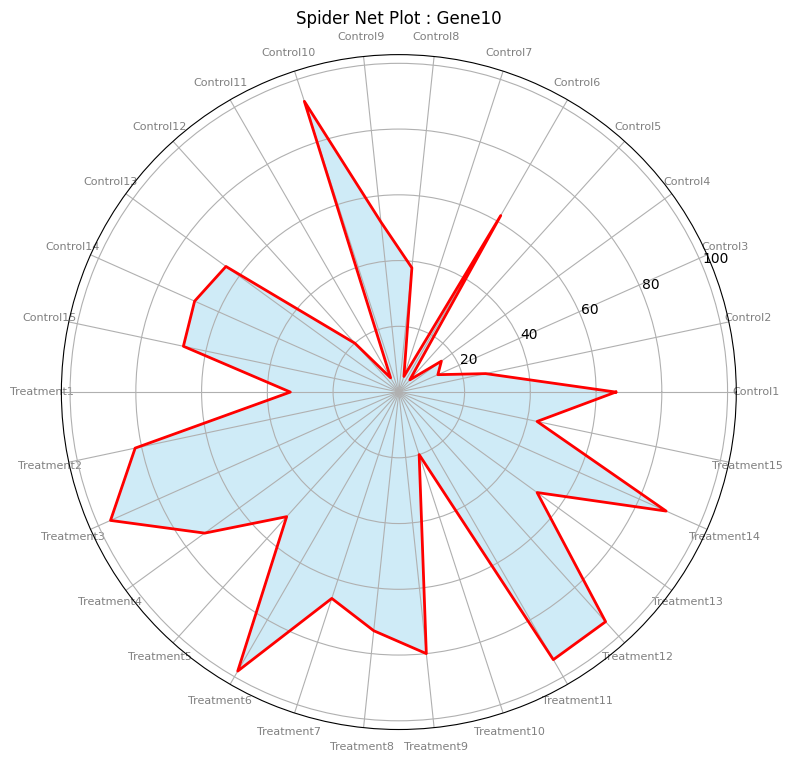

In [3]:
# Spider net

from math import pi

# Choose a gene
gene = "Gene10"
gene_row = data[data["Gene"] == gene].iloc[0]
values = gene_row[control_cols + treatment_cols].values

# Create radar plot
labels = control_cols + treatment_cols
num_vars = len(labels)

# Calculate angles for each variable
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]
values = np.concatenate((values, [values[0]]))

# plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], labels, color='grey', size=8)
ax.plot(angles, values, color='red', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='skyblue', alpha=0.4)
plt.title(f'Spider Net Plot : {gene}')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

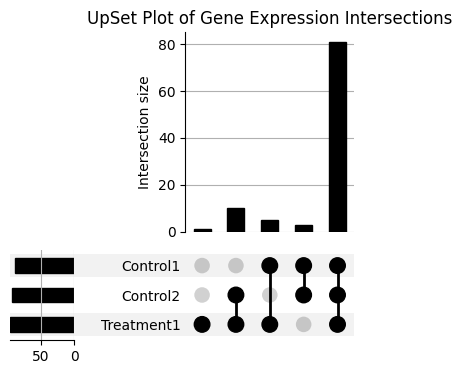

In [5]:
# Step 1: Install required library (if not already installed)
# !pip install upsetplot

# Step 2: Import libraries
import pandas as pd
from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings from upsetplot
warnings.filterwarnings('ignore', category=FutureWarning)

# Step 3: Load your dataset
data = pd.read_csv("cancer_expression.csv")

# Step 4: Define conditions for gene membership
# Example: genes with high expression in Control1, Control2, Treatment1
threshold = 10  # adjust based on your data scale
memberships = []

for _, row in data.iterrows():
    sets = []
    if row['Control1'] > threshold:
        sets.append('Control1')
    if row['Control2'] > threshold:
        sets.append('Control2')
    if row['Treatment1'] > threshold:
        sets.append('Treatment1')
    memberships.append(sets)

# Step 5: Create UpSet data
upset_data = from_memberships(memberships)

# Step 6: Plot
plt.figure(figsize=(10, 6))
UpSet(upset_data, subset_size='count').plot()
plt.title("UpSet Plot of Gene Expression Intersections")
plt.show()

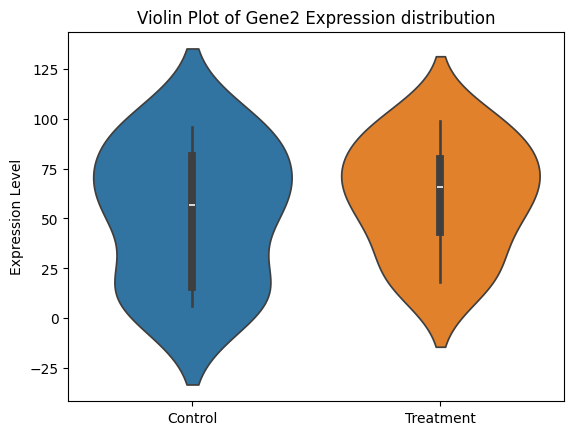

In [6]:
gene = "Gene2"
gene_row = data[data["Gene"] == gene].iloc[0]

data = [gene_row[control_cols].values, gene_row[treatment_cols].values]

sns.violinplot(data=data)
plt.xticks([0, 1], ['Control', 'Treatment'])
plt.ylabel('Expression Level')
plt.title(f'Violin Plot of {gene} Expression distribution')
plt.show()